In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
import pandas as pd
import numpy as np

In [4]:
phrases = ["I am going to have a pizza delivered for dinner.",
          "I am going to try that new French restaurant for dinner.",
          "I prefer reading over going to the movies.",
          "I prefer going to the movies over reading books.",
          "I have friends in New York City.",
          "She loves going to the movies."]

In [5]:
vect = TfidfVectorizer(min_df=1)

In [6]:
tfidf = vect.fit_transform(phrases)

In [7]:
cosine = (tfidf * tfidf.T).A
print cosine

[[ 1.          0.414471    0.12286451  0.10835914  0.12736866  0.1231687 ]
 [ 0.414471    1.          0.10445553  0.09212351  0.10828481  0.10471413]
 [ 0.12286451  0.10445553  1.          0.88194008  0.          0.42482132]
 [ 0.10835914  0.09212351  0.88194008  1.          0.          0.37466695]
 [ 0.12736866  0.10828481  0.          0.          1.          0.        ]
 [ 0.1231687   0.10471413  0.42482132  0.37466695  0.          1.        ]]


In [8]:
df = pd.DataFrame(cosine, index=phrases, columns=phrases)

In [9]:
df

,I am going to have a pizza delivered for dinner.,I am going to try that new French restaurant for dinner.,I prefer reading over going to the movies.,I prefer going to the movies over reading books.,I have friends in New York City.,She loves going to the movies.
I am going to have a pizza delivered for dinner.,1.000000,0.414471,0.122865,0.108359,0.127369,0.123169
I am going to try that new French restaurant for dinner.,0.414471,1.000000,0.104456,0.092124,0.108285,0.104714
I prefer reading over going to the movies.,0.122865,0.104456,1.000000,0.881940,0.000000,0.424821
I prefer going to the movies over reading books.,0.108359,0.092124,0.881940,1.000000,0.000000,0.374667
I have friends in New York City.,0.127369,0.108285,0.000000,0.000000,1.000000,0.000000
She loves going to the movies.,0.123169,0.104714,0.424821,0.374667,0.000000,1.000000


In [11]:
import seaborn as sns

In [12]:
%matplotlib inline

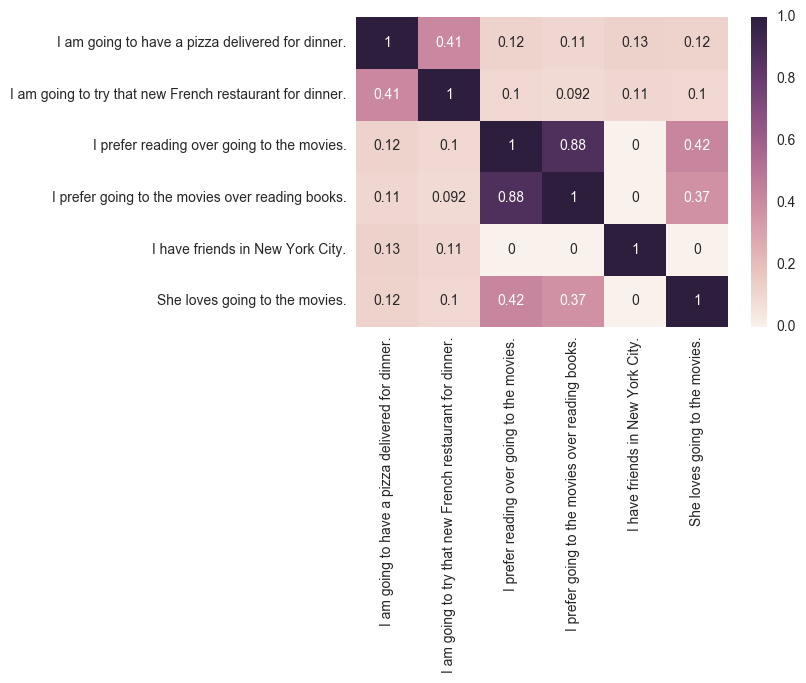

In [13]:
sns.heatmap(df, annot=True)

In [14]:
from sklearn.decomposition import NMF

In [15]:
d1 = open("tfidf-1.txt").read()
d2 = open("tfidf-2.txt").read()
d3 = open("tfidf-3.txt").read()
d4 = open("tfidf-4.txt").read()
d5 = open("tfidf-5.txt").read()
d6 = open("tfidf-6.txt").read()
d7 = open("tfidf-7.txt").read()
d8 = open("tfidf-8.txt").read()
d9 = open("tfidf-9.txt").read()
d10 = open("tfidf-10.txt").read()

In [16]:
dataset = [d1, d2, d3, d4, d5, d6, d7, d8, d9, d10]

In [17]:
vectorizer = TfidfVectorizer(min_df=1, max_features=100, stop_words="english")

In [18]:
tfidf = vectorizer.fit_transform(dataset)

In [19]:
nmf = NMF(n_components=10, random_state=1).fit(tfidf)

In [20]:
feature_names = vectorizer.get_feature_names()

In [21]:
for topic_idx, topic in enumerate(nmf.components_):
    print("Topic #%d:" %topic_idx)
    print " ".join([feature_names[i]
                  for i in topic.argsort()[:-10 -1:-1]])
    print "\n"

Topic #0:
revolution french revolutionary napoleon political leading global popular modern republic


Topic #1:
tesla electrical wireless work york popular new power american series


Topic #2:
newton work earth time day later european president church government


Topic #3:
leonardo man time later widely world life history april france


Topic #4:
lunar module armstrong apollo earth landed command july 11 man


Topic #5:
rockefeller oil church life american modern man national supported central


Topic #6:
war soviet union axis germany allies japan united invasion 1945


Topic #7:
titanic ship passengers safety people april new wireless world led


Topic #8:
washington american president british continental national army united states war


Topic #9:
napoleon french coalition europe france battle empire military army allies


